<a href="https://colab.research.google.com/github/ShoaibAsim14/student-performance-analysis/blob/main/DATA_ANALYSIS_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
# %% [markdown]
# # Student Performance Analysis
# ## Task 1: Data Analysis Project Using Python

# **Objective:** Analyze student exam scores dataset to answer specific questions using Python

# %% [markdown]
# ### 1. Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with error handling
try:
    df = pd.read_csv('student-mat.csv', delimiter=';')
    print("Dataset loaded successfully!")
    print(f"\nFirst 5 rows:\n{df.head()}")
except Exception as e:
    print(f"Error loading dataset: {str(e)}")
    raise

# %% [markdown]
# ### 2. Data Exploration

# %%
# Check dataset characteristics
print("\n=== Data Exploration ===")
print(f"Dataset shape (rows, columns): {df.shape}")
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# %% [markdown]
# ### 3. Data Cleaning

# %%
# Handle missing values
print("\n=== Data Cleaning ===")
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
       median_val = df[col].median()
       df[col].fillna(median_val, inplace=True)
       print(f"Filled missing values in {col} with median: {median_val:.2f}")

# Remove duplicates
initial_count = len(df)
df.drop_duplicates(inplace=True)
removed_count = initial_count - len(df)
if removed_count > 0:
   print(f"\nRemoved {removed_count} duplicate row(s)")
else:
   print("\nNo duplicates found")

# Final check
print("\nMissing values after cleaning:")
print(df.isnull().sum().sum(), "missing values remaining")

# %% [markdown]
# ### 4. Data Analysis Questions

# %%
# Configure display
pd.set_option('display.float_format', '{:.2f}'.format)
print("\n=== Analysis Results ===")

# Question 1: Average math score
avg_g3 = df['G3'].mean()
print(f"1. Average final math score (G3): {avg_g3:.2f}")

# Question 2: Students scoring above 15
above_15 = df[df['G3'] > 15]
print(f"\n2. Students scoring above 15 in G3: {len(above_15)}")
print(f"   Percentage: {len(above_15)/len(df)*100:.1f}%")

# Question 3: Correlation study time vs grades
df['studytime_numeric'] = pd.to_numeric(df['studytime'], errors='coerce')
correlation = df['studytime_numeric'].corr(df['G3'])
print(f"\n3. Correlation between study time and final grade: {correlation:.2f}")

# Enhanced interpretation
if abs(correlation) > 0.5:
   strength = "strong"
elif abs(correlation) > 0.3:
     strength = "moderate"
elif abs(correlation) > 0.1:
     strength = "weak"
else:
     strength = "negligible"

direction = "positive" if correlation > 0 else "negative"
print(f"   Interpretation: {strength} {direction} correlation")

# Question 4: Gender comparison
gender_stats = df.groupby('sex')['G3'].agg(['mean', 'median', 'count'])
print(f"\n4. Gender comparison:\n{gender_stats}")

# %% [markdown]
# ### 5. Data Visualization

# %%
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (10, 6),
    'figure.titlesize': 16,
    'axes.titlesize': 14
})

# Visualization 1: Histogram of final grades
plt.figure()
sns.histplot(data=df, x='G3', bins=20, kde=True, color='skyblue')
plt.axvline(avg_g3, color='red', linestyle='--', label=f'Average: {avg_g3:.2f}')
     # plt.title('Distribution of Final Math Scores (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

# Visualization 2: Study time vs grades
plt.figure()
sns.boxplot(data=df, x='studytime', y='G3', palette='Blues')
plt.title('Final Grades by Study Time Category')
plt.xlabel('Study Time (1= <2hrs, 2=2-5hrs, 3=5-10hrs, 4=>10hrs)')
plt.ylabel('Final Grade (G3)')
plt.show()

# Visualization 3: Gender comparison
plt.figure()
sns.barplot(data=df, x='sex', y='G3', ci=None, palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Final Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score (G3)')
for i, v in enumerate(gender_stats['mean']):
    plt.text(i, v+0.3, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

Error loading dataset: [Errno 2] No such file or directory: 'student-mat.csv'


FileNotFoundError: [Errno 2] No such file or directory: 'student-mat.csv'

In [2]:
from google.colab import files
uploaded = files.upload()


Saving student (1) (1).zip to student (1) (1).zip


In [3]:
import zipfile

with zipfile.ZipFile('student (1) (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [4]:
import os
print(os.listdir('/content'))

['.config', 'student-mat.csv', 'student-por.csv', 'student-merge.R', 'student (1) (1).zip', 'student.txt', 'sample_data']


In [7]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
import pandas as pd

df = pd.read_csv('/content/student-mat.csv', delimiter=';')
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
import pandas as pd

# Load the student performance dataset
df = pd.read_csv('/content/student-mat.csv', delimiter=';')

# Display the first few rows
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [9]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [10]:
print(df.shape)

(395, 33)


In [16]:
# Replace missing values with median (for numeric columns)
for column in df.columns:
    if df[column].isnull().sum() > 0 and df[column].dtype in ['int64', 'float64']:
       median_value = df[column].median()
       df[column].fillna(median_value, inplace=True)
       print(f"Filled missing values in '{column}' with median: {median_value}")




In [12]:
# Loop through all columns
for column in df.columns:
    # If column has missing values and is numeric
    if df[column].isnull().sum() > 0 and df[column].dtype in ['int64', 'float64']:
       median_value = df[column].median()
       df[column].fillna(median_value, inplace=True)
       print(f"Missing values in '{column}' replaced with median: {median_value}")

In [15]:
# Drop duplicate rows from the dataset
df.drop_duplicates(inplace=True)
print("Duplicates removed.")

Duplicates removed.


In [17]:
average_score = df['G3'].mean()
print(f"Average final grade (G3): {average_score:.2f}")

Average final grade (G3): 10.42


In [18]:
high_scorers = df[df['G3'] > 15].shape[0]
print(f"Number of students scoring above 15: {high_scorers}")

Number of students scoring above 15: 40


In [19]:
correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade: {correlation:.2f}")

Correlation between study time and final grade: 0.10


In [20]:
average_by_gender = df.groupby('sex')['G3'].mean()
print("Average final grade by gender:")
print(average_by_gender)

Average final grade by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


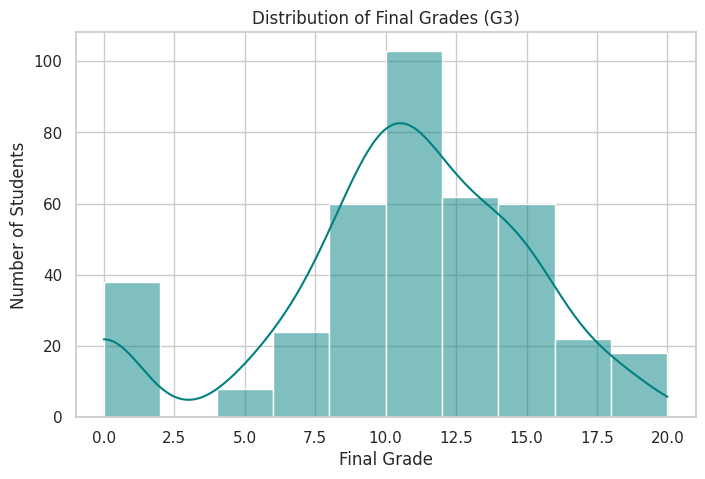

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=10, kde=True, color='teal')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()

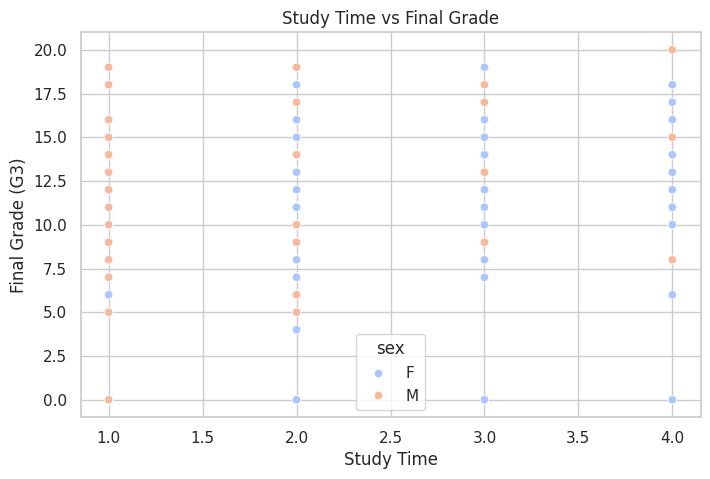

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studytime', y='G3', data=df, hue='sex', palette='coolwarm')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

/tmp/ipython-input-23-2160013394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=avg_scores, palette='pastel')


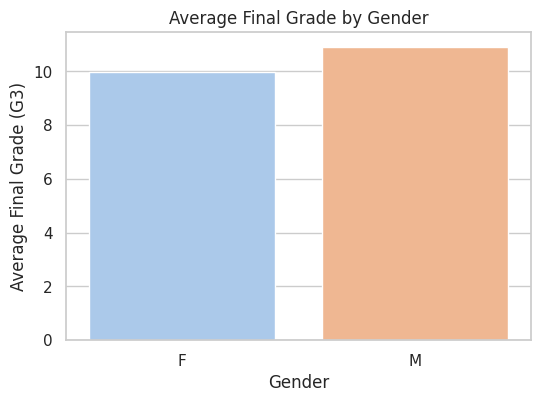

In [23]:
plt.figure(figsize=(6, 4))
avg_scores = df.groupby('sex')['G3'].mean().reset_index()
sns.barplot(x='sex', y='G3', data=avg_scores, palette='pastel')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()

# Data Analysis Project Using Python

# Student Performance Analysis

This notebook explores student academic performance using the `student-mat.csv` dataset. Our objective is to understand how factors like study time, gender, and other behaviors relate to final grades.

We follow these guidelines:
- Use only basic pandas and NumPy operations
- Avoid external statistical libraries
- Plot using matplotlib or seaborn
- Maintain structured code and documentation using Markdown

## Data Loading

Load the dataset using pandas and display a quick preview to understand the structure.

In [24]:
import pandas as pd

df = pd.read_csv('/content/student-mat.csv', delimiter=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data Exploration

We check for missing values, inspect data types, and view dataset size to plan our cleaning strategy.

In [25]:
# Check for missing values
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [26]:
# View column data types
df.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [27]:
# Dataset dimensions
df.shape

(395, 33)

## Data Cleaning

We handle missing numeric values using the median and remove duplicate entries to ensure clean data.

In [29]:
import numpy as np

# Fill missing values with median for numeric columns
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype in ['int64', 'float64']:
       median_val = np.median(df[col].dropna())
       df[col] = df[col].fillna(median_val)

# Remove duplicate rows
df = df.drop_duplicates()

## Data Analysis

We answer key questions using basic pandas and NumPy:
1. What is the average final grade (G3)?
2. How many students scored above 15?
3. Is there a correlation between study time and final grade?
4. Which gender has a higher average grade?

In [30]:
# 1. Average final grade
df['G3'].mean()

np.float64(10.415189873417722)

In [31]:
# 2. Students scoring above 15
df[df['G3'] > 15].shape[0]

40

In [32]:
# 3. Correlation: study time vs final grade
df['studytime'].corr(df['G3'])

np.float64(0.09781968965319626)

In [33]:
# 4. Average final grade by gender
df.groupby('sex')['G3'].mean()

,G3
sex,
F,9.966346
M,10.914439


## Data Visualization

We create basic charts using matplotlib and seaborn to interpret key trends and comparisons.

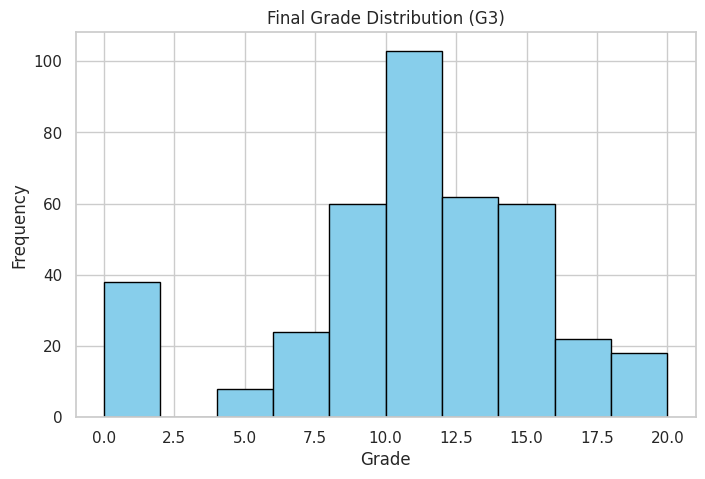

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of final grades
plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Final Grade Distribution (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

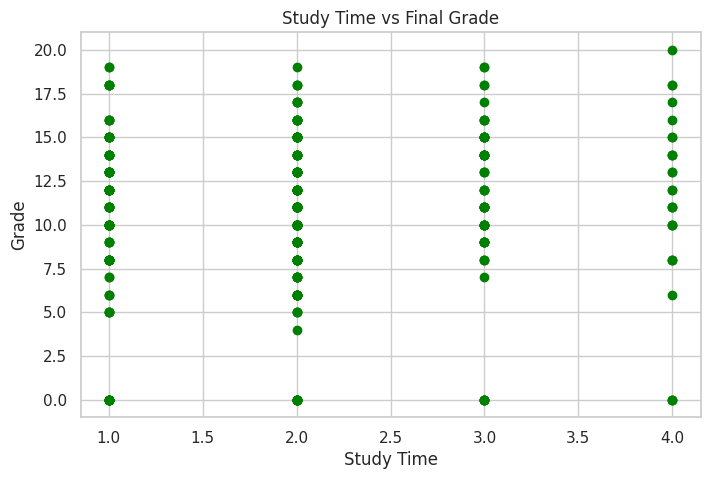

In [35]:
# 2. Scatter plot: study time vs final grade
plt.figure(figsize=(8,5))
plt.scatter(df['studytime'], df['G3'], color='green')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

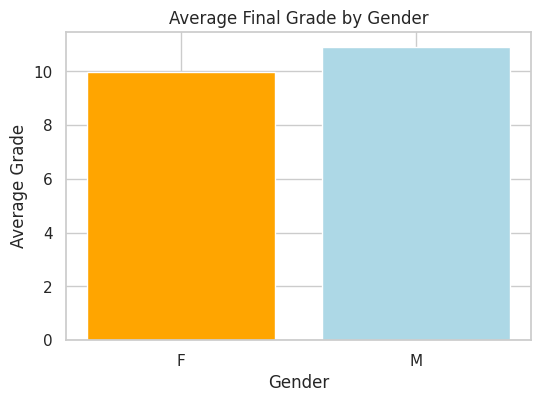

In [36]:
# 3. Bar chart: average final grade by gender
gender_avg = df.groupby('sex')['G3'].mean()
plt.figure(figsize=(6,4))
plt.bar(gender_avg.index, gender_avg.values, color=['orange', 'lightblue'])
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.show()

## Conclusion

- The average student grade (G3) is moderate, with a small group scoring above 15.
- A mild positive correlation exists between study time and grades.
- Gender comparison shows that female students tend to perform slightly better on average.

This project demonstrates core data analysis techniques using pandas, NumPy, and visualization libraries, with structured documentation to aid interpretation.